<a href="https://colab.research.google.com/github/michalis0/Business-Intelligence-and-Analytics/blob/master/labs/08%20-%20Regression%201/Exercises/Solutions/exercise_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise: Supervised Learning, Linear Regression

This exercise is an application of what you learned in the walkthrough. The following cell gather the different modules you need for this exercise (take a look at the sklearn library).

Some exercises consist of filling a part of the code without writing the whole code. Replace the `"YOUR CODE HERE"` with your own code.

In [1]:
# Useful starting lines
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings('ignore')

# Sklearn import
from sklearn.preprocessing import MinMaxScaler # Normalization
from sklearn.linear_model import LinearRegression # Regression linear model
from sklearn.model_selection import train_test_split # Splitting the data set
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # Metrics for errors
from sklearn.model_selection import KFold # Cross validation

## 1. Load data

In this exercise, we use data on advertising expenses across various platforms and product sales. The goal is to understand how different advertising platforms impact sales.

Load the dataset from the given URL. Then display the first 5 rows.


In [23]:
url = 'https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/master/data/Advertising.csv'
# Load the data
data = pd.read_csv(url, index_col=0)
display(data.head())

# Number of oberservations and columns
print("Number of observations: ", data.shape[0])
print("Number of columns: ", data.shape[1])

,TV,Radio,Newspaper,Sales
id,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Number of observations:  200
Number of columns:  4


Next, we will try a simple linear regression using only one feature (univariate regression), that is, we want to predict the `sales` using only the `TV` feature (which is money spent on TV).

To get a first sense of the relationship between different variables, display the correlation table.

In [24]:
# Display the correlation table
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


## 2. Using Sklearn

When using sklearn, we don't need to add a column of ones to the data in order to have the constant parameter. Sklearn takes care of it for you, you just need to set the `fit_intercept` argument to be True (which also the default value for this argument).

1. From the dataset, save the feature `TV` and the target `Sales` in two different variables X and y respectively in a dataframe pandas format (not as a series) (`data[['sth']]` instead of `data['sth]`).
2. Split the data into a train and a test set. The test set size should be 20% of the original data. Additionally, set the `random_state` to 0 and `shuffle` to `True`.
3. Create a linear regression model using `LinearRegression` module from sklearn. Make sure it includes an intercept. Then, fit the model with the corresponding data.
4. Print the values of the intercept and coefficients.
5. Compute the R2, MAE, and MSE.
6. Plot the regression


In [27]:
# 1. Create X, y
X = data[["TV"]]
y = data[["Sales"]]

In [28]:
# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

For this excerise, we don't require you to normalize the data, but this is how it can be done:

```python
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train))
X_test = pd.DataFrame(scaler.transfrom(X_test))
```

In [29]:
# 3. Create the linear regression model
model = LinearRegression(fit_intercept=True)

# Fit model
model.fit(X_train, y_train)

LinearRegression()

In [30]:
# 4. Model parameters
print("Model intercept: ", model.intercept_)
print("Model coefficients: ", model.coef_)

Model intercept:  [7.29249377]
Model coefficients:  [[0.04600779]]


In [31]:
# 5. Model performance
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R2: {r2:.2f}")
print(f"Mean square error (MSE): {mse:.2f}")
print(f"Mean absolute error (MAE): {mae:.2f}")

R2: 0.68
Mean square error (MSE): 10.19
Mean absolute error (MAE): 2.51


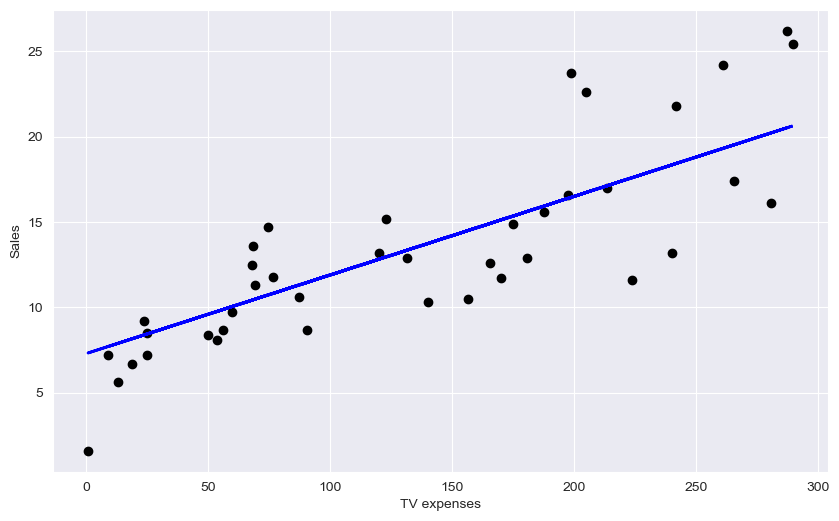

In [32]:
# 6. Plot the regression
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=2)
plt.xlabel("TV expenses")
plt.ylabel("Sales")
plt.show()

Using this single-variate model, you can simply switch the feature (`TV`, `Radio`, `Newspapers`) to see which predicts the target variable (`Sales`) the best.

**Hint:** Simply change the feature variable and re-run the cells above. Then compare the evaluation metrics (r2, MAE and MSE).

In [35]:
evaluation = pd.DataFrame(index=["R2", "MSE", "MAE"])

for feature in ['TV', 'Radio', 'Newspaper']:
    X = data[[feature]]
    y = data[["Sales"]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)
    
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    evaluation[feature] = [r2, mse, mae]
    
evaluation.round(2)

,TV,Radio,Newspaper
R2,0.68,0.23,-0.02
MSE,10.19,24.24,32.14
MAE,2.51,3.72,4.70


From the result above, we can see that `TV` feature has the highest R2, lowest MSE and lowest MAE.

## 3. Using more features for prediction

Let's try to use all features to predict the sales. 

1. From the dataset, save all the features to X and the target `sales` to y in dataframe pandas format.
2. Split the data into a train and a test set. The test set size should be 20% of the original data. Additionally, set the `random_state` to 0 and `shuffle` to `True`.
3. Create a linear regression model using `LinearRegression` module from sklearn. Make sure it includes an intercept. Then, fit the model with the corresponding data.
4. Print the values of the intercept and coefficients.
5. Compute the R2, MAE, and MSE.

In [36]:
# 1. Use all features
X = data.drop("Sales", axis=1)
y = data[["Sales"]]

In [37]:
# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

In [38]:
# 3. Create the linear regression model
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

LinearRegression()

In [39]:
# 4. Print the model parameters
print("Model intercept: ", model.intercept_)
print("Model coefficients: ", model.coef_)

Model intercept:  [2.99489303]
Model coefficients:  [[ 0.04458402  0.19649703 -0.00278146]]


In [40]:
# 5. Model performance
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R2: {r2:.2f}")
print(f"Mean square error (MSE): {mse:.2f}")
print(f"Mean absolute error (MAE): {mae:.2f}")

R2: 0.86
Mean square error (MSE): 4.40
Mean absolute error (MAE): 1.36


Does the model performance (evaluated using R2, MAE, and MSE) improve significantly when using all features? Does the model become "better"?

In [41]:
# Compute how much each of the metrics has improved
print("Improvement in R2: ", round(r2 - evaluation.loc["R2"].max(), 2))
print("Improvement in MSE: ", round(mse - evaluation.loc["MSE"].max(), 2))
print("Improvement in MAE: ", round(mae - evaluation.loc["MAE"].max(), 2))

Improvement in R2:  0.18
Improvement in MSE:  -27.74
Improvement in MAE:  -3.33


We can see that every evaluation metric is improved (increase in R2, decrease in MAE and MSE). Therefore, we can conclude that the model has become "better" when using all the features.